In [1]:
import time
import sys
from matplotlib import animation
from IPython.display import HTML

In [171]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=1, n_targets=1, bias=50, noise=30, random_state=0)
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [172]:
X.shape

(1000, 2)

In [173]:
y.shape

(1000,)

## GD(Gradient Descent)
---

In [174]:
W0 = np.array([10, 771])

In [175]:
def cost(X, y, W):
    m = X.shape[0]
    sqr_error = (np.dot(X, W) - y) ** 2
    return sqr_error.sum() / (2 * m)

In [119]:
def cost2(X, y, W):
    m, k = X.shape
    y_pred = []
    #dot product
    for i in range(m):
        y_hat_i = 0
        for j in range(k):
            y_hat_i += X[i, j] * W[j]
        y_pred.append(y_hat_i)
    
    sqr_error = []
    for i in range(m):
        sqr_error.append((y_pred[i] - y[i])**2)
     
    sum_cost = 0
    for i in range(m):
        sum_cost += sqr_error[i]
    
    total_cost = sum_cost / (2 * m)
    
    return total_cost, np.array(y_pred)
    

In [120]:
a = cost(X, y, W0)
a

234267.82967985966

In [121]:
b, c = cost2(X, y, W0)
b

234267.82967985995

In [174]:
ww = np.vstack((np.ones((100,))*50, np.linspace(-10000, 10000, 100))).T
ww.shape

(100, 2)

In [175]:
cost_val = []
for w in ww:
    cost_w = cost(X, y, w)
    cost_val.append(cost_w)

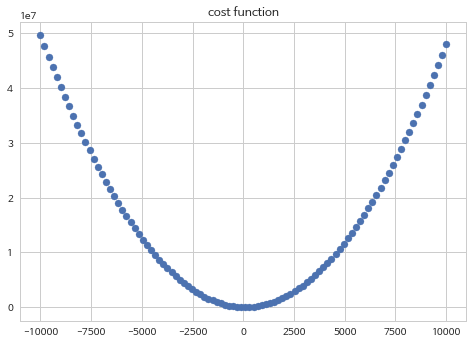

In [177]:
plt.scatter(ww[:, 1], cost_val)
plt.title('cost function')
plt.show()

$$W = [w_0, w_1, \cdots , w_k], k\ 는\ feature\ 갯수 $$

$$\hat{y_i} = \sum_{j}^{k}{x_{ij} \cdot w_j} = X_i \cdot W\ ,\ i\ sample\ 에\ 대해서$$

$$ Cost(W) = \frac{\sum_{i}^{m}{(\hat{y_i} - y_i )^2}}{2\times m} = \frac{\sum_{i}^{m}{(X_i \cdot W - y_i )^2}}{2\times m} $$ 

m은 여기서 데이터 샘플 수 (X혹은 y 의 길이)

In [176]:
def d_cost(X, y, W): #gradient
    m = X.shape[0]
    error = np.dot(X, W) - y
    gradient = np.dot(X.T, error) / m
    return gradient

In [214]:
def d_cost2(X, y, W):
    m, k = X.shape
    X_T = X.T
    
    y_pred = []
    #dot product
    for i in range(m):
        y_hat_i = 0
        for j in range(k):
            y_hat_i += X[i, j] * W[j]
        y_pred.append(y_hat_i)
        
    error = []
    for i in range(m):
        error.append(y_pred[i] - y[i])
    
    
    dW = []
    for j in range(k):
        dw_j = 0
        for i in range(m):
            dw_j += X_T[j, i] * error[i]
        dw_j = dw_j / m
        dW.append(dw_j)
    
    return np.array(dW)

In [215]:
d_cost(X, y, W0)

array([ -71.95760007,  674.4912119 ])

In [216]:
d_cost2(X, y, W0)

array([ -71.95760007,  674.4912119 ])

$$gradient = \frac{\partial{Cost(W)}}{\partial{W}} = \frac{\sum_{i}^{m}{X_{i}^{T}(X_i \cdot W - y_i})}{m}$$

In [177]:
def gradient_descent(X, y, W0, n=10000, alpha=0.01, epsilon=1e-6):
    start = time.time()
    W = W0
    min_cost = np.inf
    history_ = {'epoch': [], 'cost': [], 'min_cost': [], 'W': [], 'y': []}
       
    for epoch in range(n):
        
        gradient = d_cost(X, y, W)
        W = W - alpha * gradient
        new_cost = cost(X, y, W)
        
        #length_of_gradient = np.linalg.norm(gradient, 2 )
        #if length_of_gradient < epsilon:
        #    break
        if history_['cost'][epoch]
        
        if new_cost < min_cost:
            min_cost = new_cost

        
        history_['epoch'].append(epoch)
        history_['cost'].append(new_cost)
        history_['min_cost'].append(min_cost)
        history_['W'].append(W)
        history_['y'].append(np.dot(X, W))
        
    end = time.time() - start
    print('Time: {}'.format(end))
    print('last epoch: {}'.format(history_['epoch'][-1]))
    return W, history_

for each epoch

$$W:= W - \alpha \times \frac{\partial{Cost(W)}}{\partial{W}}$$

In [178]:
w_val, history_ = gradient_descent(X, y, W0, n=1000, alpha=0.1)

Time: 0.03269815444946289
last epoch: 202


In [219]:
w_val

array([ 50.77632795,  82.01323422])

In [189]:
np.diff(history_['cost'][0:10]) < 1e-8

array([ True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [192]:
abs(np.diff(history_['cost'][0:10])) < 1e-6

array([False, False, False, False, False, False, False, False, False], dtype=bool)

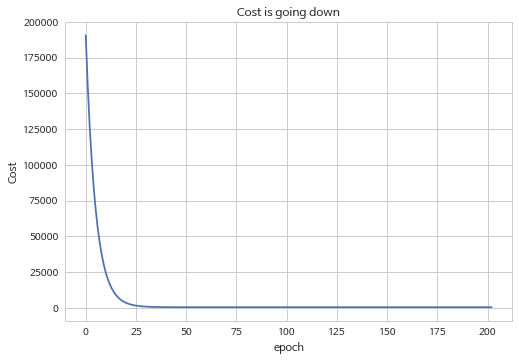

In [184]:
plt.plot(history_['epoch'], history_['cost'])
plt.title('Cost is going down')
plt.xlabel('epoch')
plt.ylabel('Cost')
plt.show()

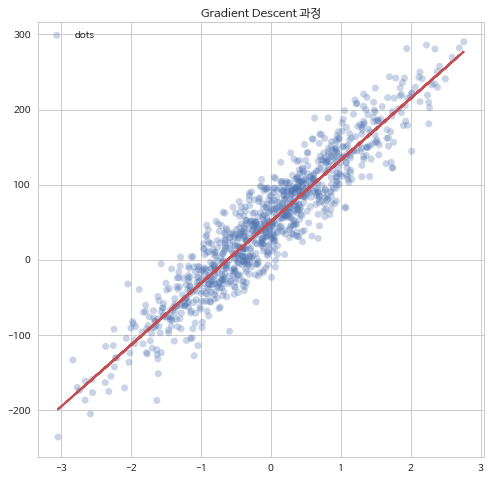

In [225]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
line, = ax1.plot([], [], 'r-', lw=2)
plt.scatter(X[:, 1], y, label='dots', alpha=0.3, edgecolors='none')
plt.title('Gradient Descent 과정')
plt.legend()
plt.grid(True)
fram = history_['epoch'][-1]

def animate(i):    
    xs = X[:, 1]
    ys = history_['y'][i]
    line.set_data(xs, ys)
    return line,

def init():
    line.set_data([], [])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=50, blit=True)
HTML(anim.to_html5_video())

## SGD
---

In [226]:
def nextbatch(X, y, batch_size):
    for i in range(0, X.shape[0], batch_size):
        yield (X[i:i + batch_size], y[i:i + batch_size])

In [230]:
def SGD(X, y, W0, n=10000, alpha=0.01, batch_size=10, epsilon=1e-6):
    
    start = time.time()
    total = np.hstack([y.reshape(-1, 1), X])
    np.random.shuffle(total)
    X = total[:, 1:]
    y = total[:, 0]
    
    W = W0
    min_cost = np.inf
    history_ = {'epoch': [], 'cost': [], 'min_cost': [], 'W': [], 'y': []}
    
    for epoch in range(n):
        for (batchX, batchY) in nextbatch(X, y, batch_size):
            gradient = d_cost(batchX, batchY, W)
            W = W - alpha * gradient
            new_cost = cost(batchX, batchY, W)
            
            length_of_gradient = np.linalg.norm(gradient, 2 )
                if length_of_gradient < epsilon:
                    break
                    
            if new_cost < min_cost:
                min_cost = new_cost

        history_['epoch'].append(epoch)
        history_['cost'].append(new_cost)
        history_['min_cost'].append(min_cost)
        history_['W'].append(W)
        history_['y'].append(np.dot(X, W))
    end = time.time() - start
    print('Time: {}'.format(end))
    print('last epoch: {}'.format(history_['epoch'][-1]))

    return W, history_

In [231]:
w_val_SGD, history_ = SGD(X, y, W0, batch_size=15)

Time: 0.5118367671966553
last epoch: 9999


In [232]:
w_val_SGD

array([ 44.24029309,  85.0542129 ])

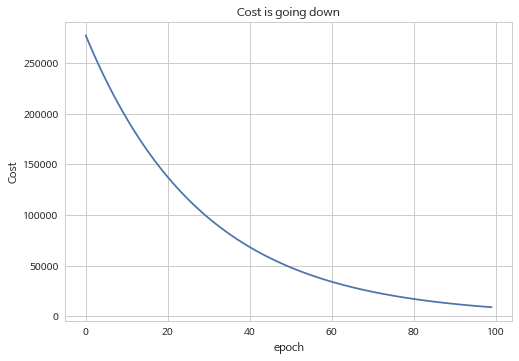

In [233]:
plt.plot(history_['epoch'][:100], history_['cost'][:100])
plt.title('Cost is going down')
plt.xlabel('epoch')
plt.ylabel('Cost')
plt.show()

## Gradient Descent(SGD)
---

In [2]:
def f2(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2

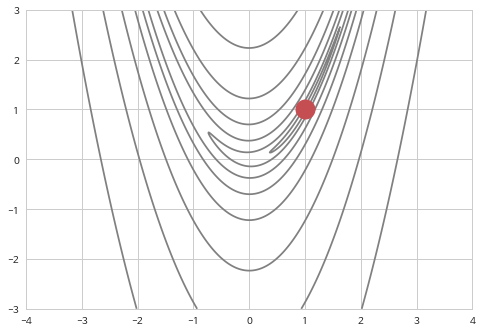

In [3]:
xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

plt.contour(X, Y, Z, colors="gray", levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=20)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))
plt.show()

In [4]:
def f2g(x, y):
    """gradient of f2(x)"""
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))

In [8]:
x0 = 3.
y0 = -2.

In [9]:
def gradient_descent(x, y, n=1000, alpha=0.01, epsilon=1e-6):
    min_cost = np.inf
    history_ = {'epoch': [], 'cost': [], 'min_cost': [], 'x': [x], 'y': [y]}
       
    for epoch in range(n):
        gradient = f2g(x, y)
        x = x - alpha * gradient[0]
        y = x - alpha * gradient[1]
        new_cost = f2(x, y)

        
        length_of_gradient = np.linalg.norm(gradient, 2 )
        if length_of_gradient < epsilon:
            break
            
        if new_cost < min_cost:
            min_cost = new_cost
        
        history_['epoch'].append(epoch)
        history_['cost'].append(new_cost)
        history_['min_cost'].append(min_cost)
        history_['x'].append(x)
        history_['y'].append(y)
    
    result = (x, y)
    print('last epoch: {}'.format(history_['epoch'][-1]))
    return result, history_

In [10]:
result, history_ = gradient_descent(x0, y0, alpha=0.0001)

last epoch: 463


In [11]:
result

(1.0000000020979194, 1.0000000021407072)

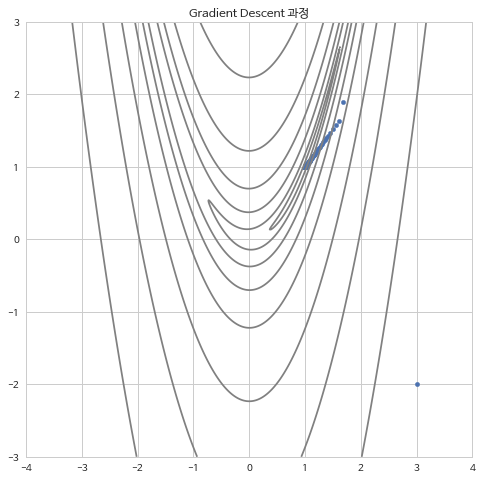

In [12]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
plt.contour(X, Y, Z, colors="gray", levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
scat = ax.scatter([], [], s=20)
plt.title('Gradient Descent 과정')
plt.grid(True)
fram = history_['epoch'][-1]

def animate(i):
    data = np.hstack((np.array(history_['x'])[:i, np.newaxis], np.array(history_['y'])[:i, np.newaxis]))
    scat.set_offsets(data)
    return scat,

def init():
    scat.set_offsets([])
    return scat,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=50, blit=True)
HTML(anim.to_html5_video())

## Momentum
---

In [13]:
def velocity(gradient, alpha, gamma, his_v):
    v_x = gamma * his_v[-1][0] + alpha * gradient[0]
    v_y = gamma * his_v[-1][1] + alpha * gradient[1]
    return np.array((v_x, v_y))

$$v_t = \gamma v_{t-1} + \eta \nabla_{\theta}J(\theta)$$

$$\theta = \theta - v_t$$

In [14]:
def Momentum(x, y, n=1000, alpha=0.01, gamma=0.9, epsilon=1e-6):
    min_cost = np.inf
    history_ = {'epoch': [], 'cost': [], 'min_cost': [], 'x': [x], 'y': [y], 'his_v': [np.array([0, 0])]}
       
    for epoch in range(n):
        gradient = f2g(x, y)
        v = velocity(gradient, alpha, gamma, his_v= history_['his_v'])
        x = x - v[0]
        y = x - v[1]
        new_cost = f2(x, y)
        
        length_of_gradient = np.linalg.norm(gradient, 2 )
        if length_of_gradient < epsilon:
            break
            
        if new_cost < min_cost:
            min_cost = new_cost
            
        history_['his_v'].append(v)
        history_['epoch'].append(epoch)
        history_['cost'].append(new_cost)
        history_['min_cost'].append(min_cost)
        history_['x'].append(x)
        history_['y'].append(y)
    
    result = (x, y)
    print('last epoch: {}'.format(history_['epoch'][-1]))
    return result, history_

In [15]:
result, history_ = Momentum(x0, y0, alpha=0.0001)

last epoch: 312


In [16]:
result

(1.0000000025622802, 1.0000000008844279)

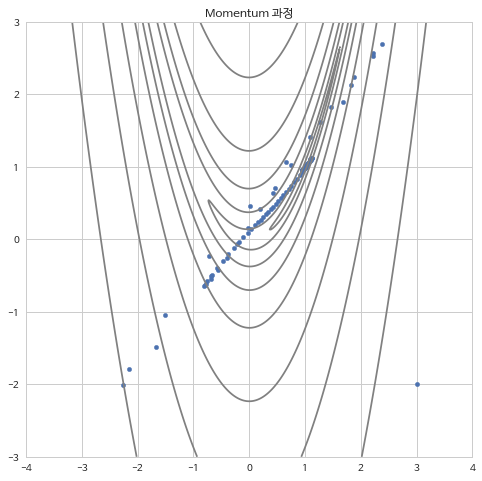

In [17]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
plt.contour(X, Y, Z, colors="gray", levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
scat = ax.scatter([], [], s=20)
plt.title('Momentum 과정')
plt.grid(True)
fram = history_['epoch'][-1]

def animate(i):
    data = np.hstack((np.array(history_['x'])[:i, np.newaxis], np.array(history_['y'])[:i, np.newaxis]))
    scat.set_offsets(data)
    return scat,

def init():
    scat.set_offsets([])
    return scat,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=50, blit=True)
HTML(anim.to_html5_video())

## Nesterov Accelerated Gradient (NAG)
---

$$v_t = \gamma v_{t-1}+ \eta\nabla_{\theta}J(\theta-\gamma v_{t-1})$$

$$\theta = \theta - v_t$$

In [14]:
def f2g_NAG(x, y, gamma, his_v):
    """gradient of f2(x)"""
    x = x - gamma * his_v[-1][0]
    y = y - gamma * his_v[-1][1]
    dx = 2.0 * (x - 1) - 400.0 * x * (y - x**2)
    dy = 200.0 * (y - x**2)
    return np.array((dx, dy))

In [15]:
def velocity(gradient, alpha, gamma, his_v):
    v_x = gamma * his_v[-1][0] + alpha * gradient[0]
    v_y = gamma * his_v[-1][1] + alpha * gradient[1]
    return np.array((v_x, v_y))

In [16]:
def NAG(x, y, n=1000, alpha=0.01, gamma=0.9, epsilon=1e-6):
    min_cost = np.inf
    history_ = {'epoch': [], 'cost': [], 'min_cost': [], 'x': [x], 'y': [y], 'his_v': [np.array([0, 0])]}
       
    for epoch in range(n):
        gradient = f2g_NAG(x, y, gamma, his_v=history_['his_v'])
        v = velocity(gradient, alpha, gamma, his_v=history_['his_v'])
        x = x - v[0]
        y = x - v[1]
        new_cost = f2(x, y)
        
        length_of_gradient = np.linalg.norm(gradient, 2 )
        if length_of_gradient < epsilon:
            break
            
        if new_cost < min_cost:
            min_cost = new_cost
            
        history_['his_v'].append(v)
        history_['epoch'].append(epoch)
        history_['cost'].append(new_cost)
        history_['min_cost'].append(min_cost)
        history_['x'].append(x)
        history_['y'].append(y)
    
    result = (x, y)
    print('last epoch: {}'.format(history_['epoch'][-1]))
    return result, history_

In [17]:
result, history_ = NAG(x0, y0, alpha=0.0001)

last epoch: 137


In [18]:
result

(0.999999646204215, 0.9999995169537732)

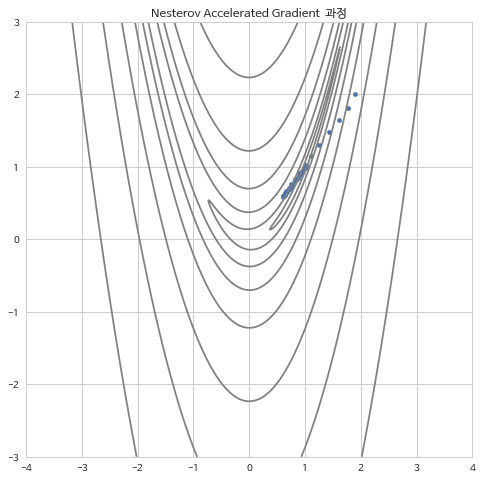

In [22]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
plt.contour(X, Y, Z, colors="gray", levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
scat = ax.scatter([], [], s=20)
plt.title('Nesterov Accelerated Gradient  과정')
plt.grid(True)
fram = history_['epoch'][-1]

def animate(i):
    data = np.hstack((np.array(history_['x'])[:i, np.newaxis], np.array(history_['y'])[:i, np.newaxis]))
    scat.set_offsets(data)
    return scat,

def init():
    scat.set_offsets([])
    return scat,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=fram, interval=50, blit=True)
HTML(anim.to_html5_video())

## Adagrad
---

$$G_{t} = G_{t-1} + (\nabla_{\theta}J(\theta_t))^2$$

$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \cdot \nabla_{\theta}J(\theta_t)$$

In [18]:
def f2g(x, y):
    """gradient of f2(x)"""
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))

In [19]:
def Adagrad(x, y, n=1000, alpha=0.01, epsilon=1e-6):
    min_cost = np.inf
    history_ = {'epoch': [], 'cost': [], 'min_cost': [], 'x': [x], 'y': [y], 'his_G': [np.array([0, 0])]}
       
    for epoch in range(n):
        # grad parts 
        gradient = f2g(x, y)
        grad = history_['his_G'][-1] + gradient**2
        # update
        x = x - alpha / np.sqrt(grad[0] + epsilon) * gradient[0]
        y = y - alpha / np.sqrt(grad[1] + epsilon) * gradient[1]
        
        new_cost = f2(x, y)
        
        length_of_gradient = np.linalg.norm(gradient, 2)
        if length_of_gradient < epsilon:
            break
            
        if new_cost < min_cost:
            min_cost = new_cost
            
        history_['his_G'].append(grad)
        history_['epoch'].append(epoch)
        history_['cost'].append(new_cost)
        history_['min_cost'].append(min_cost)
        history_['x'].append(x)
        history_['y'].append(y)
    
    result = (x, y)
    print('last epoch: {}'.format(history_['epoch'][-1]))
    return result, history_

In [20]:
result, history_ = Adagrad(x0, y0, n=90000, alpha=0.25)

last epoch: 89999


In [21]:
result

(0.97153530635131147, 0.94381339884117388)

비교

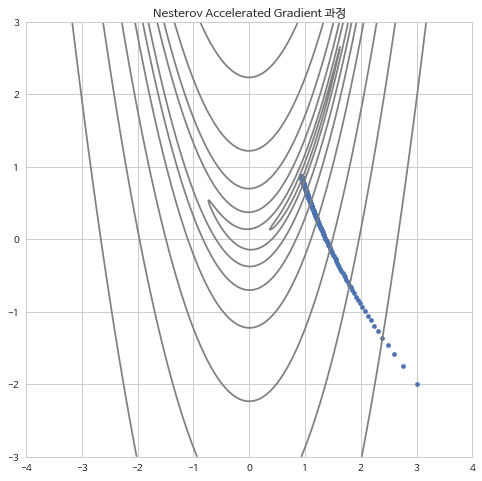

In [22]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
plt.contour(X, Y, Z, colors="gray", levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
scat = ax.scatter([], [], s=20)
plt.title('Nesterov Accelerated Gradient 과정')
plt.grid(True)
fram = history_['epoch'][-1]

def animate(i):
    data = np.hstack((np.array(history_['x'])[:i, np.newaxis], np.array(history_['y'])[:i, np.newaxis]))
    scat.set_offsets(data)
    return scat,

def init():
    scat.set_offsets([])
    return scat,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=1000, interval=15, blit=True)
HTML(anim.to_html5_video())

## RMSProp
---

$$G = \gamma G + (1-\gamma)(\nabla_{\theta}J(\theta_t))^2$$

$$\theta = \theta - \frac{\eta}{\sqrt{G + \epsilon}} \cdot \nabla_{\theta}J(\theta_t)$$

In [93]:
def RMSProp(x, y, n=1000, alpha=0.01, gamma=0.9, epsilon=1e-6):
    min_cost = np.inf
    history_ = {'epoch': [], 'cost': [], 'min_cost': [], 'x': [x], 'y': [y], 'his_G': [np.array([0, 0])]}
       
    for epoch in range(n):
        # grad parts 
        gradient = f2g(x, y)
        grad = gamma * history_['his_G'][-1] + (1 - gamma) * gradient**2

        # update
        x = x - alpha / np.sqrt(grad[0] + epsilon) * gradient[0]
        y = y - alpha / np.sqrt(grad[1] + epsilon) * gradient[1]
        
        new_cost = f2(x, y)
        
        length_of_gradient = np.linalg.norm(gradient, 2)
        if length_of_gradient < epsilon:
            break
            
        if new_cost < min_cost:
            min_cost = new_cost
            
        history_['his_G'].append(grad)
        history_['epoch'].append(epoch)
        history_['cost'].append(new_cost)
        history_['min_cost'].append(min_cost)
        history_['x'].append(x)
        history_['y'].append(y)
    
    result = (x, y)
    print('last epoch: {}'.format(history_['epoch'][-1]))
    return result, history_

In [129]:
result, history_ = RMSProp(x0, y0, n=90000, alpha=0.0001)

last epoch: 89999


In [130]:
result

(0.99994850754914166, 1.0000469759821595)

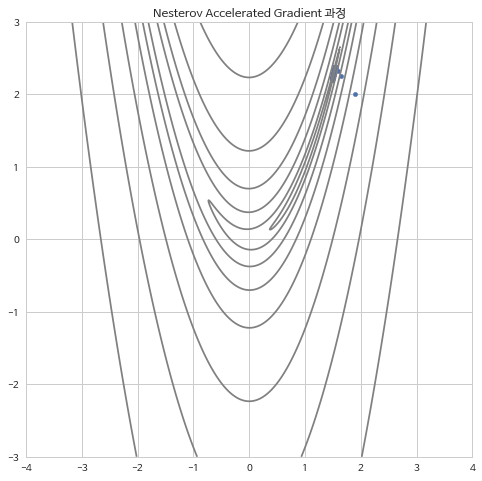

In [96]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
plt.contour(X, Y, Z, colors="gray", levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
scat = ax.scatter([], [], s=20)
plt.title('Nesterov Accelerated Gradient 과정')
plt.grid(True)
fram = history_['epoch'][-1]

def animate(i):
    data = np.hstack((np.array(history_['x'])[:i, np.newaxis], np.array(history_['y'])[:i, np.newaxis]))
    scat.set_offsets(data)
    return scat,

def init():
    scat.set_offsets([])
    return scat,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=1000, interval=15, blit=True)
HTML(anim.to_html5_video())

## AdaDelta
---

$$G = \gamma G + (1-\gamma)(\nabla_{\theta}J(\theta_t))^2$$

$$\Delta_{\theta} =  \frac{\sqrt{s+\epsilon}}{\sqrt{G + \epsilon}} \cdot \nabla_{\theta}J(\theta_t)$$

$$\theta = \theta - \Delta_{\theta}$$

$$s = \gamma s + (1-\gamma) \Delta_{\theta}^2$$

In [105]:
def AdaDelta(x, y, n=1000, gamma=0.9, epsilon=1e-6):
    min_cost = np.inf
    history_ = {'epoch': [], 'cost': [], 'min_cost': [], 'x': [x], 'y': [y], 
                'his_G': [np.array([0, 0])], 's': [np.array([0, 0])]}
       
    for epoch in range(n):
        # grad parts 
        gradient = f2g(x, y)
        grad = gamma * history_['his_G'][-1] + (1 - gamma) * (gradient**2)
        delta = np.sqrt(history_['s'][-1] + epsilon) / np.sqrt(grad + epsilon) * gradient
        s = gamma * history_['s'][-1] + (1 - gamma) * (delta**2)
        # update
        x = x - delta[0]
        y = y - delta[1]
        new_cost = f2(x, y)
        
        length_of_gradient = np.linalg.norm(gradient, 2)
        if length_of_gradient < epsilon:
            break
            
        if new_cost < min_cost:
            min_cost = new_cost
            
        history_['his_G'].append(grad)
        history_['s'].append(s)
        history_['epoch'].append(epoch)
        history_['cost'].append(new_cost)
        history_['min_cost'].append(min_cost)
        history_['x'].append(x)
        history_['y'].append(y)
    
    result = (x, y)
    print('last epoch: {}'.format(history_['epoch'][-1]))
    return result, history_

In [141]:
result, history_ = AdaDelta(x0, y0, n=4000)

last epoch: 3999


In [142]:
result

(0.98623967106614185, 0.9372769507172749)

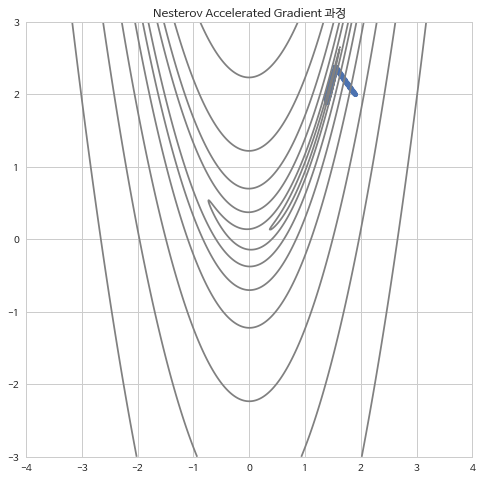

In [143]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
plt.contour(X, Y, Z, colors="gray", levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
scat = ax.scatter([], [], s=20)
plt.title('Nesterov Accelerated Gradient 과정')
plt.grid(True)
fram = history_['epoch'][-1]

def animate(i):
    data = np.hstack((np.array(history_['x'])[:i, np.newaxis], np.array(history_['y'])[:i, np.newaxis]))
    scat.set_offsets(data)
    return scat,

def init():
    scat.set_offsets([])
    return scat,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=1000, interval=15, blit=True)
HTML(anim.to_html5_video())

## Adam
---

## Adam
---
$$m_t = \beta_1 m_{t-1} + (1-\beta_1)\nabla_\theta J(\theta)$$

$$v_t = \beta_2 v_{t-1} + (1-\beta_2)(\nabla_\theta J(\theta))^2$$

$$\hat{m_t} = \frac{m_t}{1-\beta_1^t}$$

$$\hat{v_t} = \frac{v_t}{1-\beta_2^t}$$

$$\theta = \theta - \frac{\eta}{\sqrt{\hat{v_t}+\epsilon}}\hat{m_t}$$

In [125]:
def Adam(x, y, n=1000, alpha=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
    min_cost = np.inf
    history_ = {'epoch': [], 'cost': [], 'min_cost': [], 'x': [x], 'y': [y], 
                'momentum': [np.array([0, 0])], 'velocity': [np.array([0, 0])]}
       
    for epoch in range(n):
        # grad parts 
        gradient = f2g(x, y)
        mo = beta1 * history_['momentum'][-1] + (1 - beta1) * gradient
        ve = beta2 * history_['velocity'][-1] + (1 - beta2) * (gradient**2)
        mo_hat = mo / (1 - (beta1**(epoch+1)))
        ve_hat = ve / (1 - (beta2**(epoch+1)))
        # update
        x = x - alpha / np.sqrt(ve_hat[0] + epsilon) * mo_hat[0]
        y = y - alpha / np.sqrt(ve_hat[1] + epsilon) * mo_hat[1]
        new_cost = f2(x, y)
        
        length_of_gradient = np.linalg.norm(gradient, 2)
        if length_of_gradient < epsilon:
            break
            
        if new_cost < min_cost:
            min_cost = new_cost
            
        history_['momentum'].append(mo)
        history_['velocity'].append(ve)
        history_['epoch'].append(epoch)
        history_['cost'].append(new_cost)
        history_['min_cost'].append(min_cost)
        history_['x'].append(x)
        history_['y'].append(y)
    
    result = (x, y)
    print('last epoch: {}'.format(history_['epoch'][-1]))
    return result, history_

In [ ]:
result, history_ = Adagrad(x0, y0, n=90000, alpha=0.25)